In [1]:
from carbon import CarbonSimulatorUI, P, analytics as cal, __version__, __date__
from math import sqrt
print(f"Carbon v{__version__} ({__date__})")
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CarbonSimulatorUI))

Carbon v2.2-BETA2 (03/Jan/2022)
CarbonSimulatorUI v2.2.1 (16/Dec/2022)


# Carbon Simulation - Test 36 - Liquidity Approximation 2

In [2]:
Sim = CarbonSimulatorUI(verbose=False, raiseonerror=False, pair="ETH/USDC")
Sim

CarbonSimulatorUI(<0 orders, 0 trades>, pair='ETH/USDC', mm='exact', xf=True)

In [3]:
Sim.add_order("ETH", 10, 2000, 3000)
Sim.add_order("ETH", 10, 2500, 2500)
Sim.add_order("USDC", 10*1250, 1500, 1000)
Sim.add_order("USDC", 10*1250, 1250, 1250)
Sim

CarbonSimulatorUI(<8 orders, 0 trades>, pair='ETH/USDC', mm='exact', xf=True)

In [4]:
Sim.state()["orders"]

,id,pair,tkn,y_int,y,y_unit,disabled,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,10.0,10.0,ETH,False,2000.0,3000.0,2000.0,USDC per ETH,1
1,1,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,0
2,2,ETHUSDC,ETH,10.0,10.0,ETH,False,2500.0,2500.0,2500.0,USDC per ETH,3
3,3,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,2
4,4,ETHUSDC,USDC,12500.0,12500.0,USDC,False,1500.0,1000.0,1500.0,USDC per ETH,5
5,5,ETHUSDC,ETH,0.0,0.0,ETH,True,None,None,None,USDC per ETH,4
6,6,ETHUSDC,USDC,12500.0,12500.0,USDC,False,1250.0,1250.0,1250.0,USDC per ETH,7
7,7,ETHUSDC,ETH,0.0,0.0,ETH,True,None,None,None,USDC per ETH,6


In [5]:
Sim.state().keys()

dict_keys(['orders', 'orderuis', 'trades'])

In [6]:
Sim.state()["orderuis"]

{0: CarbonOrderUI(pair=ETH/USDC, B=0.018257418583505537, S=0.004103261191492361, yint=10.0, y=10.0, id=0, linked=<1>),
 1: CarbonOrderUI(pair=ETH/USDC, B=0.0, S=0.0, yint=0.0, y=0.0, id=1, linked=<0>),
 2: CarbonOrderUI(pair=ETH/USDC, B=0.02, S=0.0, yint=10.0, y=10.0, id=2, linked=<3>),
 3: CarbonOrderUI(pair=ETH/USDC, B=0.0, S=0.0, yint=0.0, y=0.0, id=3, linked=<2>),
 4: CarbonOrderUI(pair=ETH/USDC, B=31.622776601683793, S=7.107056860390376, yint=12500.0, y=12500.0, id=4, linked=<5>),
 5: CarbonOrderUI(pair=ETH/USDC, B=0.0, S=0.0, yint=0.0, y=0.0, id=5, linked=<4>),
 6: CarbonOrderUI(pair=ETH/USDC, B=35.35533905932738, S=0.0, yint=12500.0, y=12500.0, id=6, linked=<7>),
 7: CarbonOrderUI(pair=ETH/USDC, B=0.0, S=0.0, yint=0.0, y=0.0, id=7, linked=<6>)}

In [7]:
help(Sim.state()["orderuis"][0].liquidity_approx)

Help on method liquidity_approx in module carbon.carbon_order_ui:

liquidity_approx(price1, price2, tkn=None, asperc=False, ignore_state=True) method of carbon.carbon_order_ui.CarbonOrderUI instance
    returns the approximate liquidity between price1 and price2 (any order), in tkn
    
    :price1/2:      the start and end price of the range (in any order; quoted in price convention of pair)
    :tkn:           the token in which the liquidity is quoted (if None: base token)
    :asperc:        if True, return percentage total liquidity rather than tkn number; default is False
    :returns:       the liquidity in [price1, price2], quoted in tkn (or percent)
    :ignore_state:  if True (default), ignore the state y, and just look at the raw range



## Order 0 (ETH, range)

In [8]:
oui = Sim.state()["orderuis"][0]
oui.pmin, oui.pmax, oui.total_liquidity

(2000.0, 3000.0, (10.0, 'ETH'))

In [9]:
oui.liquidity_approx(500, 600, "ETH", asperc=True)

[liquidity_approx] 500 600 2000.0 3000.0


0

In [10]:
oui.liquidity_approx(3000, 3020, "ETH", asperc=True)

[liquidity_approx] 3000 3020 2000.0 3000.0


0

In [11]:
oui.liquidity_approx(2000, 3000, "ETH", asperc=True)

[liquidity_approx] 2000 3000 2000.0 3000.0


1.0

In [12]:
oui.liquidity_approx(3000, 2000, "ETH", asperc=True)

[liquidity_approx] 2000 3000 2000.0 3000.0


1.0

In [13]:
oui.liquidity_approx(2000, 2500, "ETH", asperc=True)

[liquidity_approx] 2000 2500 2000.0 3000.0


0.5

In [14]:
oui.liquidity_approx(2500, 3000, "ETH", asperc=True)

[liquidity_approx] 2500 3000 2000.0 3000.0


0.5

In [15]:
oui.liquidity_approx(2250, 2750, "ETH", asperc=True)

[liquidity_approx] 2250 2750 2000.0 3000.0


0.5

In [16]:
oui.liquidity_approx(2000, 3000, "ETH", asperc=False)

[liquidity_approx] 2000 3000 2000.0 3000.0


10.0

In [17]:
oui.liquidity_approx(2000, 2500, "ETH", asperc=False)

[liquidity_approx] 2000 2500 2000.0 3000.0


5.0

In [18]:
oui.liquidity_approx(2000, 2500, asperc=False)

[liquidity_approx] 2000 2500 2000.0 3000.0


5.0

In [19]:
oui.liquidity_approx(2000, 3000, "USDC", asperc=False), sqrt(2000*3000)

[liquidity_approx] 2000 3000 2000.0 3000.0


(24494.89742783178, 2449.489742783178)

In [20]:
oui.liquidity_approx(2250, 2750, "USDC", asperc=False), sqrt(2250*2750)*0.5

[liquidity_approx] 2250 2750 2000.0 3000.0


(12437.34296383275, 1243.734296383275)

## Order 1 (ETH, point)

In [21]:
oui = Sim.state()["orderuis"][1]
oui.pmin, oui.pmax, oui.total_liquidity

(None, None, (0.0, 'USDC'))

In [22]:
oui.liquidity_approx(2000, 2499, "ETH", asperc=True)

0

In [23]:
oui.liquidity_approx(2501, 3020, "ETH", asperc=True)

0

In [24]:
oui.liquidity_approx(2499, 2501, "ETH", asperc=True)

0

In [25]:
oui.liquidity_approx(2500, 2501, "ETH", asperc=True)

0

In [26]:
oui.liquidity_approx(2499, 2500, "ETH", asperc=True)

0

In [27]:
oui.liquidity_approx(2500, 2500, "ETH", asperc=True)

0

In [28]:
oui.liquidity_approx(2499, 2501, "ETH", asperc=False)

0

In [29]:
oui.liquidity_approx(2499, 2501, "USDC", asperc=False)

0

In [30]:
oui.liquidity_approx(2500, 2501, "USDC", asperc=False)

0

In [31]:
oui.liquidity_approx(2500, 2500, "USDC", asperc=False)

0

In [32]:
oui.liquidity_approx(2000, 3000, "USDC", asperc=False)

0

## Order 2 (USDC, range)

In [33]:
oui = Sim.state()["orderuis"][2]
oui.pmin, oui.pmax, oui.total_liquidity

(2500.0, 2500.0, (10.0, 'ETH'))

In [34]:
oui.liquidity_approx(500, 600, "USDC", asperc=False)

[liquidity_approx] 500 600 2500.0 2500.0


0

In [35]:
oui.liquidity_approx(1600, 2000, "USDC", asperc=False)

[liquidity_approx] 1600 2000 2500.0 2500.0


0

In [36]:
oui.liquidity_approx(1000, 1500, "USDC", asperc=False)

[liquidity_approx] 1000 1500 2500.0 2500.0


0

In [37]:
oui.liquidity_approx(1000, 1100, "USDC", asperc=False)

[liquidity_approx] 1000 1100 2500.0 2500.0


0

In [38]:
oui.liquidity_approx(1400, 1500, "USDC", asperc=False)

[liquidity_approx] 1400 1500 2500.0 2500.0


0

In [39]:
oui.liquidity_approx(1000, 1100, "ETH", asperc=False), 2500/sqrt(1000*1100)

[liquidity_approx] 1000 1100 2500.0 2500.0


(0, 2.3836564731139807)

In [40]:
oui.liquidity_approx(1400, 1500, "ETH", asperc=False), 2500/sqrt(1400*1500)

[liquidity_approx] 1400 1500 2500.0 2500.0


(0, 1.7251638983558855)

## Order 3 (USDC, point)

In [41]:
oui = Sim.state()["orderuis"][3]
oui.pmin, oui.pmax, oui.total_liquidity

(None, None, (0.0, 'USDC'))

In [42]:
oui.liquidity_approx(1249, 1251, "USDC", asperc=False)

0

In [43]:
oui.liquidity_approx(1000, 2000, "USDC", asperc=False)

0

In [44]:
oui.liquidity_approx(1249, 1250, "USDC", asperc=False)

0

In [45]:
oui.liquidity_approx(1250, 1251, "USDC", asperc=False)

0

In [46]:
oui.liquidity_approx(1249, 1251, "ETH", asperc=False)

0

In [47]:
oui.liquidity_approx(1000, 2000, "ETH", asperc=False)

0

In [48]:
oui.liquidity_approx(1249, 1250, "ETH", asperc=False)

0

In [49]:
oui.liquidity_approx(1250, 1251, "ETH", asperc=False)

0

## Not ignoring state
### ETH

In [50]:
Sim = CarbonSimulatorUI(verbose=False, raiseonerror=False, pair="ETH/USDC")
Sim.add_order("ETH", 10, 2000, 3000)
Sim.add_order("USDC", 10*1000, 1000, 500)
oui = Sim.state()["orderuis"][0]
oui.pmin, oui.pmax, oui.total_liquidity, oui.max_liquidity

(2000.0, 3000.0, (10.0, 'ETH'), (10.0, 'ETH'))

In [51]:
(
    oui.liquidity_approx(2000, 3000, "ETH", ignore_state=False),
    oui.liquidity_approx(2000, 2500, "ETH", ignore_state=False),
    oui.liquidity_approx(2500, 3000, "ETH", ignore_state=False),
)

[liquidity_approx] 2000 3000 2000.0 3000.0
[liquidity_approx] 2000 2500 2000.0 3000.0
[liquidity_approx] 2500 3000 2000.0 3000.0


(10.0, 5.0, 5.0)

In [52]:
Sim.amm_sells("ETH", 5)
Sim.state()["orders"].query("id==0")

,id,pair,tkn,y_int,y,y_unit,disabled,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,10.0,5.0,ETH,False,2000.0,3000.0,2424.492346,USDC per ETH,1


In [53]:
oui = Sim.state()["orderuis"][0]
oui.pmin, oui.pmax, oui.total_liquidity, oui.max_liquidity

(2000.0, 3000.0, (5.0, 'ETH'), (10.0, 'ETH'))

In [54]:
(
    oui.liquidity_approx(2000, 3000, "ETH", ignore_state=False),
    oui.liquidity_approx(2000, 2500, "ETH", ignore_state=False),
    oui.liquidity_approx(2500, 3000, "ETH", ignore_state=False),
)

[liquidity_approx] 2000 3000 2000.0 3000.0
[liquidity_approx] 2000 2500 2000.0 3000.0
[liquidity_approx] 2500 3000 2000.0 3000.0


(10.0, 5.0, 5.0)

In [55]:
Sim.amm_sells("ETH", 2.5)
Sim.state()["orders"].query("id==0")

,id,pair,tkn,y_int,y,y_unit,disabled,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,10.0,2.5,ETH,False,2000.0,3000.0,2689.306258,USDC per ETH,1


In [56]:
oui = Sim.state()["orderuis"][0]
oui.pmin, oui.pmax, oui.total_liquidity, oui.max_liquidity

(2000.0, 3000.0, (2.5, 'ETH'), (10.0, 'ETH'))

In [57]:
(
    oui.liquidity_approx(2000, 3000, "ETH", ignore_state=False),
    oui.liquidity_approx(2000, 2500, "ETH", ignore_state=False),
    oui.liquidity_approx(2500, 3000, "ETH", ignore_state=False),
)

[liquidity_approx] 2000 3000 2000.0 3000.0
[liquidity_approx] 2000 2500 2000.0 3000.0
[liquidity_approx] 2500 3000 2000.0 3000.0


(10.0, 5.0, 5.0)

### USDC

In [58]:
oui = Sim.state()["orderuis"][1]
oui.pmin, oui.pmax, oui.total_liquidity, oui.max_liquidity

(None, None, (17393.876913, 'USDC'), (17393.876913, 'USDC'))

In [59]:
(
    oui.liquidity_approx(1000, 500, "USDC", ignore_state=False),
    oui.liquidity_approx(1000, 750, "USDC", ignore_state=False),
    oui.liquidity_approx(750, 500, "USDC", ignore_state=False),
)

(0, 0, 0)

In [60]:
Sim.amm_sells("USDC", 5000)
Sim.state()["orders"].query("id==1")

,id,pair,tkn,y_int,y,y_unit,disabled,p_start,p_end,p_marg,p_unit,lid
1,1,ETHUSDC,USDC,17393.876913,17393.876913,USDC,True,None,None,None,USDC per ETH,0


In [61]:
oui = Sim.state()["orderuis"][1]
oui.pmin, oui.pmax, oui.total_liquidity, oui.max_liquidity

(None, None, (17393.876913, 'USDC'), (17393.876913, 'USDC'))

In [62]:
(
    oui.liquidity_approx(1000, 500, "USDC", ignore_state=False),
    oui.liquidity_approx(1000, 750, "USDC", ignore_state=False),
    oui.liquidity_approx(750, 500, "USDC", ignore_state=False),
)

(0, 0, 0)

In [63]:
Sim.amm_sells("USDC", 2500)
Sim.state()["orders"].query("id==1")

,id,pair,tkn,y_int,y,y_unit,disabled,p_start,p_end,p_marg,p_unit,lid
1,1,ETHUSDC,USDC,17393.876913,17393.876913,USDC,True,None,None,None,USDC per ETH,0


In [64]:
oui = Sim.state()["orderuis"][1]
oui.pmin, oui.pmax, oui.total_liquidity, oui.max_liquidity

(None, None, (17393.876913, 'USDC'), (17393.876913, 'USDC'))

In [65]:
(
    oui.liquidity_approx(1000, 500, "USDC", ignore_state=False),
    oui.liquidity_approx(1000, 750, "USDC", ignore_state=False),
    oui.liquidity_approx(750, 500, "USDC", ignore_state=False),
)

(0, 0, 0)

## Order book charts

In [66]:
prices = cal.linspace(400,3000, 500)
ETHUSDC = P(tknq="USDC", tknb="ETH")
Sim = CarbonSimulatorUI(pair=ETHUSDC, verbose=False, raiseonerror=True)
CA = cal.Analytics(Sim, verbose=True)
orders = [
    ["ETH", 100, 2000, 3000],
    ["ETH", 100, 2400, 2500],
    ["ETH", 100, 2500, 2700],
    ["USDC", 1000*150, 1500, 500],
    ["USDC", 1100*150, 1200, 1000],
]
for o in orders:
    Sim.add_order(*o)
Sim.state()["orders"]

,id,pair,tkn,y_int,y,y_unit,disabled,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,100.0,100.0,ETH,False,2000.0,3000.0,2000.0,USDC per ETH,1
1,1,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,0
2,2,ETHUSDC,ETH,100.0,100.0,ETH,False,2400.0,2500.0,2400.0,USDC per ETH,3
3,3,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,2
4,4,ETHUSDC,ETH,100.0,100.0,ETH,False,2500.0,2700.0,2500.0,USDC per ETH,5
5,5,ETHUSDC,USDC,0.0,0.0,USDC,True,None,None,None,USDC per ETH,4
6,6,ETHUSDC,USDC,150000.0,150000.0,USDC,False,1500.0,500.0,1500.0,USDC per ETH,7
7,7,ETHUSDC,ETH,0.0,0.0,ETH,True,None,None,None,USDC per ETH,6
8,8,ETHUSDC,USDC,165000.0,165000.0,USDC,False,1200.0,1000.0,1200.0,USDC per ETH,9
9,9,ETHUSDC,ETH,0.0,0.0,ETH,True,None,None,None,USDC per ETH,8


[liquidity_approx] 400.0 405.21042084168334 2000.0 3000.0
[liquidity_approx] 400.0 405.21042084168334 2399.9999999999995 2500.0
[liquidity_approx] 400.0 405.21042084168334 2500.0 2700.0
[liquidity_approx] 405.21042084168334 410.42084168336675 2000.0 3000.0
[liquidity_approx] 405.21042084168334 410.42084168336675 2399.9999999999995 2500.0
[liquidity_approx] 405.21042084168334 410.42084168336675 2500.0 2700.0
[liquidity_approx] 410.42084168336675 415.6312625250501 2000.0 3000.0
[liquidity_approx] 410.42084168336675 415.6312625250501 2399.9999999999995 2500.0
[liquidity_approx] 410.42084168336675 415.6312625250501 2500.0 2700.0
[liquidity_approx] 415.6312625250501 420.8416833667335 2000.0 3000.0
[liquidity_approx] 415.6312625250501 420.8416833667335 2399.9999999999995 2500.0
[liquidity_approx] 415.6312625250501 420.8416833667335 2500.0 2700.0
[liquidity_approx] 420.8416833667335 426.05210420841684 2000.0 3000.0
[liquidity_approx] 420.8416833667335 426.05210420841684 2399.9999999999995 250

[liquidity_approx] 676.1523046092184 681.3627254509017 2399.9999999999995 2500.0
[liquidity_approx] 676.1523046092184 681.3627254509017 2500.0 2700.0
[liquidity_approx] 681.3627254509017 686.5731462925851 2000.0 3000.0
[liquidity_approx] 681.3627254509017 686.5731462925851 2399.9999999999995 2500.0
[liquidity_approx] 681.3627254509017 686.5731462925851 2500.0 2700.0
[liquidity_approx] 686.5731462925851 691.7835671342685 2000.0 3000.0
[liquidity_approx] 686.5731462925851 691.7835671342685 2399.9999999999995 2500.0
[liquidity_approx] 686.5731462925851 691.7835671342685 2500.0 2700.0
[liquidity_approx] 691.7835671342685 696.9939879759519 2000.0 3000.0
[liquidity_approx] 691.7835671342685 696.9939879759519 2399.9999999999995 2500.0
[liquidity_approx] 691.7835671342685 696.9939879759519 2500.0 2700.0
[liquidity_approx] 696.9939879759519 702.2044088176353 2000.0 3000.0
[liquidity_approx] 696.9939879759519 702.2044088176353 2399.9999999999995 2500.0
[liquidity_approx] 696.9939879759519 702.20

[liquidity_approx] 1369.1382765531062 1374.3486973947897 2500.0 2700.0
[liquidity_approx] 1374.3486973947897 1379.5591182364728 2000.0 3000.0
[liquidity_approx] 1374.3486973947897 1379.5591182364728 2399.9999999999995 2500.0
[liquidity_approx] 1374.3486973947897 1379.5591182364728 2500.0 2700.0
[liquidity_approx] 1379.5591182364728 1384.7695390781564 2000.0 3000.0
[liquidity_approx] 1379.5591182364728 1384.7695390781564 2399.9999999999995 2500.0
[liquidity_approx] 1379.5591182364728 1384.7695390781564 2500.0 2700.0
[liquidity_approx] 1384.7695390781564 1389.9799599198395 2000.0 3000.0
[liquidity_approx] 1384.7695390781564 1389.9799599198395 2399.9999999999995 2500.0
[liquidity_approx] 1384.7695390781564 1389.9799599198395 2500.0 2700.0
[liquidity_approx] 1389.9799599198395 1395.190380761523 2000.0 3000.0
[liquidity_approx] 1389.9799599198395 1395.190380761523 2399.9999999999995 2500.0
[liquidity_approx] 1389.9799599198395 1395.190380761523 2500.0 2700.0
[liquidity_approx] 1395.19038076

[liquidity_approx] 2239.2785571142285 2244.4889779559117 2399.9999999999995 2500.0
[liquidity_approx] 2239.2785571142285 2244.4889779559117 2500.0 2700.0
[liquidity_approx] 2244.4889779559117 2249.699398797595 2000.0 3000.0
[liquidity_approx] 2244.4889779559117 2249.699398797595 2399.9999999999995 2500.0
[liquidity_approx] 2244.4889779559117 2249.699398797595 2500.0 2700.0
[liquidity_approx] 2249.699398797595 2254.909819639279 2000.0 3000.0
[liquidity_approx] 2249.699398797595 2254.909819639279 2399.9999999999995 2500.0
[liquidity_approx] 2249.699398797595 2254.909819639279 2500.0 2700.0
[liquidity_approx] 2254.909819639279 2260.120240480962 2000.0 3000.0
[liquidity_approx] 2254.909819639279 2260.120240480962 2399.9999999999995 2500.0
[liquidity_approx] 2254.909819639279 2260.120240480962 2500.0 2700.0
[liquidity_approx] 2260.120240480962 2265.330661322645 2000.0 3000.0
[liquidity_approx] 2260.120240480962 2265.330661322645 2399.9999999999995 2500.0
[liquidity_approx] 2260.120240480962

[liquidity_approx] 822.0440881763527 827.2545090180361 1000.0 1200.0000000000002
[liquidity_approx] 827.2545090180361 832.4649298597194 500.00000000000006 1500.0
[liquidity_approx] 827.2545090180361 832.4649298597194 1000.0 1200.0000000000002
[liquidity_approx] 832.4649298597194 837.6753507014027 500.00000000000006 1500.0
[liquidity_approx] 832.4649298597194 837.6753507014027 1000.0 1200.0000000000002
[liquidity_approx] 837.6753507014027 842.8857715430861 500.00000000000006 1500.0
[liquidity_approx] 837.6753507014027 842.8857715430861 1000.0 1200.0000000000002
[liquidity_approx] 842.8857715430861 848.0961923847696 500.00000000000006 1500.0
[liquidity_approx] 842.8857715430861 848.0961923847696 1000.0 1200.0000000000002
[liquidity_approx] 848.0961923847696 853.3066132264529 500.00000000000006 1500.0
[liquidity_approx] 848.0961923847696 853.3066132264529 1000.0 1200.0000000000002
[liquidity_approx] 853.3066132264529 858.5170340681362 500.00000000000006 1500.0
[liquidity_approx] 853.30661

[liquidity_approx] 2124.6492985971945 2129.8597194388776 1000.0 1200.0000000000002
[liquidity_approx] 2129.8597194388776 2135.070140280561 500.00000000000006 1500.0
[liquidity_approx] 2129.8597194388776 2135.070140280561 1000.0 1200.0000000000002
[liquidity_approx] 2135.070140280561 2140.2805611222448 500.00000000000006 1500.0
[liquidity_approx] 2135.070140280561 2140.2805611222448 1000.0 1200.0000000000002
[liquidity_approx] 2140.2805611222448 2145.490981963928 500.00000000000006 1500.0
[liquidity_approx] 2140.2805611222448 2145.490981963928 1000.0 1200.0000000000002
[liquidity_approx] 2145.490981963928 2150.701402805611 500.00000000000006 1500.0
[liquidity_approx] 2145.490981963928 2150.701402805611 1000.0 1200.0000000000002
[liquidity_approx] 2150.701402805611 2155.9118236472946 500.00000000000006 1500.0
[liquidity_approx] 2150.701402805611 2155.9118236472946 1000.0 1200.0000000000002
[liquidity_approx] 2155.9118236472946 2161.122244488978 500.00000000000006 1500.0
[liquidity_approx

[liquidity_approx] 2385.1703406813626 2390.380761523046 1000.0 1200.0000000000002
[liquidity_approx] 2390.380761523046 2395.5911823647293 500.00000000000006 1500.0
[liquidity_approx] 2390.380761523046 2395.5911823647293 1000.0 1200.0000000000002
[liquidity_approx] 2395.5911823647293 2400.801603206413 500.00000000000006 1500.0
[liquidity_approx] 2395.5911823647293 2400.801603206413 1000.0 1200.0000000000002
[liquidity_approx] 2400.801603206413 2406.0120240480965 500.00000000000006 1500.0
[liquidity_approx] 2400.801603206413 2406.0120240480965 1000.0 1200.0000000000002
[liquidity_approx] 2406.0120240480965 2411.2224448897796 500.00000000000006 1500.0
[liquidity_approx] 2406.0120240480965 2411.2224448897796 1000.0 1200.0000000000002
[liquidity_approx] 2411.2224448897796 2416.4328657314627 500.00000000000006 1500.0
[liquidity_approx] 2411.2224448897796 2416.4328657314627 1000.0 1200.0000000000002
[liquidity_approx] 2416.4328657314627 2421.6432865731463 500.00000000000006 1500.0
[liquidity_

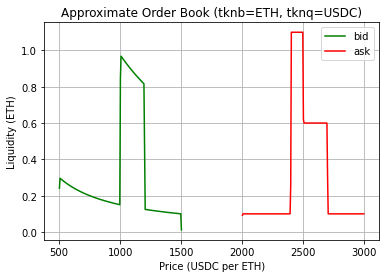

In [67]:
liq = cal.calc_liquidity_approx(Sim.state()["orderuis"], prices, ETHUSDC, reverse=False, ignore_state=True)
cal.plot_approx_orderbook_chart(liq)

In [68]:
#liqr = cal.calc_liquidity_approx(Sim.state()["orderuis"], prices, ETHUSDC, reverse=True)
#cal.plot_approx_orderbook_chart(liqr)

In [69]:
Sim.amm_sells("ETH", 50)
Sim.amm_sells("USDC", 900*150)
Sim.state()["orders"]

,id,pair,tkn,y_int,y,y_unit,disabled,p_start,p_end,p_marg,p_unit,lid
0,0,ETHUSDC,ETH,100.000000,52.289034,ETH,False,2000.0,3000.0,2402.221437,USDC per ETH,1
1,1,ETHUSDC,USDC,104577.854722,104577.854722,USDC,True,None,None,None,USDC per ETH,0
2,2,ETHUSDC,ETH,100.000000,97.710966,ETH,False,2400.0,2500.0,2402.221439,USDC per ETH,3
3,3,ETHUSDC,USDC,5496.223035,5496.223035,USDC,True,None,None,None,USDC per ETH,2
4,4,ETHUSDC,ETH,100.000000,100.000000,ETH,False,2500.0,2700.0,2500.0,USDC per ETH,5
5,5,ETHUSDC,USDC,0.000000,0.000000,USDC,True,None,None,None,USDC per ETH,4
6,6,ETHUSDC,USDC,150000.000000,98530.188755,USDC,False,1500.0,500.0,1096.474199,USDC per ETH,7
7,7,ETHUSDC,ETH,40.133565,40.133565,ETH,True,None,None,None,USDC per ETH,6
8,8,ETHUSDC,USDC,165000.000000,81469.811245,USDC,False,1200.0,1000.0,1096.474199,USDC per ETH,9
9,9,ETHUSDC,ETH,72.820496,72.820496,ETH,True,None,None,None,USDC per ETH,8


[liquidity_approx] 400.0 405.21042084168334 2000.0 3000.0
[liquidity_approx] 400.0 405.21042084168334 2399.9999999999995 2500.0
[liquidity_approx] 400.0 405.21042084168334 2500.0 2700.0
[liquidity_approx] 405.21042084168334 410.42084168336675 2000.0 3000.0
[liquidity_approx] 405.21042084168334 410.42084168336675 2399.9999999999995 2500.0
[liquidity_approx] 405.21042084168334 410.42084168336675 2500.0 2700.0
[liquidity_approx] 410.42084168336675 415.6312625250501 2000.0 3000.0
[liquidity_approx] 410.42084168336675 415.6312625250501 2399.9999999999995 2500.0
[liquidity_approx] 410.42084168336675 415.6312625250501 2500.0 2700.0
[liquidity_approx] 415.6312625250501 420.8416833667335 2000.0 3000.0
[liquidity_approx] 415.6312625250501 420.8416833667335 2399.9999999999995 2500.0
[liquidity_approx] 415.6312625250501 420.8416833667335 2500.0 2700.0
[liquidity_approx] 420.8416833667335 426.05210420841684 2000.0 3000.0
[liquidity_approx] 420.8416833667335 426.05210420841684 2399.9999999999995 250

[liquidity_approx] 1369.1382765531062 1374.3486973947897 2500.0 2700.0
[liquidity_approx] 1374.3486973947897 1379.5591182364728 2000.0 3000.0
[liquidity_approx] 1374.3486973947897 1379.5591182364728 2399.9999999999995 2500.0
[liquidity_approx] 1374.3486973947897 1379.5591182364728 2500.0 2700.0
[liquidity_approx] 1379.5591182364728 1384.7695390781564 2000.0 3000.0
[liquidity_approx] 1379.5591182364728 1384.7695390781564 2399.9999999999995 2500.0
[liquidity_approx] 1379.5591182364728 1384.7695390781564 2500.0 2700.0
[liquidity_approx] 1384.7695390781564 1389.9799599198395 2000.0 3000.0
[liquidity_approx] 1384.7695390781564 1389.9799599198395 2399.9999999999995 2500.0
[liquidity_approx] 1384.7695390781564 1389.9799599198395 2500.0 2700.0
[liquidity_approx] 1389.9799599198395 1395.190380761523 2000.0 3000.0
[liquidity_approx] 1389.9799599198395 1395.190380761523 2399.9999999999995 2500.0
[liquidity_approx] 1389.9799599198395 1395.190380761523 2500.0 2700.0
[liquidity_approx] 1395.19038076

[liquidity_approx] 2239.2785571142285 2244.4889779559117 2399.9999999999995 2500.0
[liquidity_approx] 2239.2785571142285 2244.4889779559117 2500.0 2700.0
[liquidity_approx] 2244.4889779559117 2249.699398797595 2000.0 3000.0
[liquidity_approx] 2244.4889779559117 2249.699398797595 2399.9999999999995 2500.0
[liquidity_approx] 2244.4889779559117 2249.699398797595 2500.0 2700.0
[liquidity_approx] 2249.699398797595 2254.909819639279 2000.0 3000.0
[liquidity_approx] 2249.699398797595 2254.909819639279 2399.9999999999995 2500.0
[liquidity_approx] 2249.699398797595 2254.909819639279 2500.0 2700.0
[liquidity_approx] 2254.909819639279 2260.120240480962 2000.0 3000.0
[liquidity_approx] 2254.909819639279 2260.120240480962 2399.9999999999995 2500.0
[liquidity_approx] 2254.909819639279 2260.120240480962 2500.0 2700.0
[liquidity_approx] 2260.120240480962 2265.330661322645 2000.0 3000.0
[liquidity_approx] 2260.120240480962 2265.330661322645 2399.9999999999995 2500.0
[liquidity_approx] 2260.120240480962

[liquidity_approx] 561.5230460921844 566.7334669338677 1000.0 1200.0000000000002
[liquidity_approx] 566.7334669338677 571.943887775551 500.00000000000006 1500.0
[liquidity_approx] 566.7334669338677 571.943887775551 1000.0 1200.0000000000002
[liquidity_approx] 571.943887775551 577.1543086172345 500.00000000000006 1500.0
[liquidity_approx] 571.943887775551 577.1543086172345 1000.0 1200.0000000000002
[liquidity_approx] 577.1543086172345 582.3647294589179 500.00000000000006 1500.0
[liquidity_approx] 577.1543086172345 582.3647294589179 1000.0 1200.0000000000002
[liquidity_approx] 582.3647294589179 587.5751503006012 500.00000000000006 1500.0
[liquidity_approx] 582.3647294589179 587.5751503006012 1000.0 1200.0000000000002
[liquidity_approx] 587.5751503006012 592.7855711422845 500.00000000000006 1500.0
[liquidity_approx] 587.5751503006012 592.7855711422845 1000.0 1200.0000000000002
[liquidity_approx] 592.7855711422845 597.995991983968 500.00000000000006 1500.0
[liquidity_approx] 592.7855711422

[liquidity_approx] 1864.128256513026 1869.3386773547095 1000.0 1200.0000000000002
[liquidity_approx] 1869.3386773547095 1874.5490981963928 500.00000000000006 1500.0
[liquidity_approx] 1869.3386773547095 1874.5490981963928 1000.0 1200.0000000000002
[liquidity_approx] 1874.5490981963928 1879.7595190380762 500.00000000000006 1500.0
[liquidity_approx] 1874.5490981963928 1879.7595190380762 1000.0 1200.0000000000002
[liquidity_approx] 1879.7595190380762 1884.9699398797595 500.00000000000006 1500.0
[liquidity_approx] 1879.7595190380762 1884.9699398797595 1000.0 1200.0000000000002
[liquidity_approx] 1884.9699398797595 1890.1803607214429 500.00000000000006 1500.0
[liquidity_approx] 1884.9699398797595 1890.1803607214429 1000.0 1200.0000000000002
[liquidity_approx] 1890.1803607214429 1895.3907815631262 500.00000000000006 1500.0
[liquidity_approx] 1890.1803607214429 1895.3907815631262 1000.0 1200.0000000000002
[liquidity_approx] 1895.3907815631262 1900.6012024048096 500.00000000000006 1500.0
[liqu

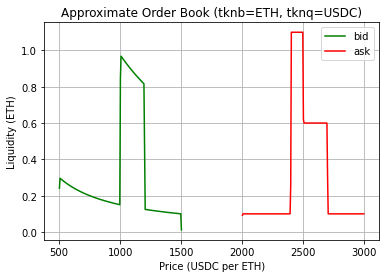

In [70]:
liq = cal.calc_liquidity_approx(Sim.state()["orderuis"], prices, ETHUSDC, reverse=False, ignore_state=True)
cal.plot_approx_orderbook_chart(liq)

[liquidity_approx] 400.0 405.21042084168334 2000.0 3000.0
[liquidity_approx] 400.0 405.21042084168334 2399.9999999999995 2500.0
[liquidity_approx] 400.0 405.21042084168334 2500.0 2700.0
[liquidity_approx] 405.21042084168334 410.42084168336675 2000.0 3000.0
[liquidity_approx] 405.21042084168334 410.42084168336675 2399.9999999999995 2500.0
[liquidity_approx] 405.21042084168334 410.42084168336675 2500.0 2700.0
[liquidity_approx] 410.42084168336675 415.6312625250501 2000.0 3000.0
[liquidity_approx] 410.42084168336675 415.6312625250501 2399.9999999999995 2500.0
[liquidity_approx] 410.42084168336675 415.6312625250501 2500.0 2700.0
[liquidity_approx] 415.6312625250501 420.8416833667335 2000.0 3000.0
[liquidity_approx] 415.6312625250501 420.8416833667335 2399.9999999999995 2500.0
[liquidity_approx] 415.6312625250501 420.8416833667335 2500.0 2700.0
[liquidity_approx] 420.8416833667335 426.05210420841684 2000.0 3000.0
[liquidity_approx] 420.8416833667335 426.05210420841684 2399.9999999999995 250

[liquidity_approx] 1374.3486973947897 1379.5591182364728 2500.0 2700.0
[liquidity_approx] 1379.5591182364728 1384.7695390781564 2000.0 3000.0
[liquidity_approx] 1379.5591182364728 1384.7695390781564 2399.9999999999995 2500.0
[liquidity_approx] 1379.5591182364728 1384.7695390781564 2500.0 2700.0
[liquidity_approx] 1384.7695390781564 1389.9799599198395 2000.0 3000.0
[liquidity_approx] 1384.7695390781564 1389.9799599198395 2399.9999999999995 2500.0
[liquidity_approx] 1384.7695390781564 1389.9799599198395 2500.0 2700.0
[liquidity_approx] 1389.9799599198395 1395.190380761523 2000.0 3000.0
[liquidity_approx] 1389.9799599198395 1395.190380761523 2399.9999999999995 2500.0
[liquidity_approx] 1389.9799599198395 1395.190380761523 2500.0 2700.0
[liquidity_approx] 1395.190380761523 1400.4008016032064 2000.0 3000.0
[liquidity_approx] 1395.190380761523 1400.4008016032064 2399.9999999999995 2500.0
[liquidity_approx] 1395.190380761523 1400.4008016032064 2500.0 2700.0
[liquidity_approx] 1400.40080160320

[liquidity_approx] 2244.4889779559117 2249.699398797595 2399.9999999999995 2500.0
[liquidity_approx] 2244.4889779559117 2249.699398797595 2500.0 2700.0
[liquidity_approx] 2249.699398797595 2254.909819639279 2000.0 3000.0
[liquidity_approx] 2249.699398797595 2254.909819639279 2399.9999999999995 2500.0
[liquidity_approx] 2249.699398797595 2254.909819639279 2500.0 2700.0
[liquidity_approx] 2254.909819639279 2260.120240480962 2000.0 3000.0
[liquidity_approx] 2254.909819639279 2260.120240480962 2399.9999999999995 2500.0
[liquidity_approx] 2254.909819639279 2260.120240480962 2500.0 2700.0
[liquidity_approx] 2260.120240480962 2265.330661322645 2000.0 3000.0
[liquidity_approx] 2260.120240480962 2265.330661322645 2399.9999999999995 2500.0
[liquidity_approx] 2260.120240480962 2265.330661322645 2500.0 2700.0
[liquidity_approx] 2265.330661322645 2270.5410821643286 2000.0 3000.0
[liquidity_approx] 2265.330661322645 2270.5410821643286 2399.9999999999995 2500.0
[liquidity_approx] 2265.330661322645 22

[liquidity_approx] 571.943887775551 577.1543086172345 500.00000000000006 1500.0
[liquidity_approx] 571.943887775551 577.1543086172345 1000.0 1200.0000000000002
[liquidity_approx] 577.1543086172345 582.3647294589179 500.00000000000006 1500.0
[liquidity_approx] 577.1543086172345 582.3647294589179 1000.0 1200.0000000000002
[liquidity_approx] 582.3647294589179 587.5751503006012 500.00000000000006 1500.0
[liquidity_approx] 582.3647294589179 587.5751503006012 1000.0 1200.0000000000002
[liquidity_approx] 587.5751503006012 592.7855711422845 500.00000000000006 1500.0
[liquidity_approx] 587.5751503006012 592.7855711422845 1000.0 1200.0000000000002
[liquidity_approx] 592.7855711422845 597.995991983968 500.00000000000006 1500.0
[liquidity_approx] 592.7855711422845 597.995991983968 1000.0 1200.0000000000002
[liquidity_approx] 597.995991983968 603.2064128256513 500.00000000000006 1500.0
[liquidity_approx] 597.995991983968 603.2064128256513 1000.0 1200.0000000000002
[liquidity_approx] 603.20641282565

[liquidity_approx] 1874.5490981963928 1879.7595190380762 500.00000000000006 1500.0
[liquidity_approx] 1874.5490981963928 1879.7595190380762 1000.0 1200.0000000000002
[liquidity_approx] 1879.7595190380762 1884.9699398797595 500.00000000000006 1500.0
[liquidity_approx] 1879.7595190380762 1884.9699398797595 1000.0 1200.0000000000002
[liquidity_approx] 1884.9699398797595 1890.1803607214429 500.00000000000006 1500.0
[liquidity_approx] 1884.9699398797595 1890.1803607214429 1000.0 1200.0000000000002
[liquidity_approx] 1890.1803607214429 1895.3907815631262 500.00000000000006 1500.0
[liquidity_approx] 1890.1803607214429 1895.3907815631262 1000.0 1200.0000000000002
[liquidity_approx] 1895.3907815631262 1900.6012024048096 500.00000000000006 1500.0
[liquidity_approx] 1895.3907815631262 1900.6012024048096 1000.0 1200.0000000000002
[liquidity_approx] 1900.6012024048096 1905.811623246493 500.00000000000006 1500.0
[liquidity_approx] 1900.6012024048096 1905.811623246493 1000.0 1200.0000000000002
[liqui

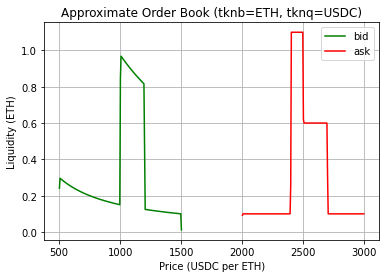

In [71]:
liq = cal.calc_liquidity_approx(Sim.state()["orderuis"], prices, ETHUSDC, reverse=False, ignore_state=False)
cal.plot_approx_orderbook_chart(liq)